# <center><font style="color:rgb(100,109,254)"> Histogram Equalization</font><center>

Consider an image whose pixel values are confined to some specific range of values only. For example, a brighter image will have all pixels confined to high values and similarly a dark image will have all intensity values on the lower end. But a good looking image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This improves the contrast of the image.

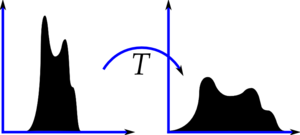

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##  <font style="color:rgb(134,19,348)">Histogram Equalization in OpenCV </font>

Now in opencv you can do the equalization by using the function `cv2.equalizeHist()`

[```cv2.equalizeHist(src)```](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

- `src` Source 8-bit single channel image.

Now lets equalize the image below so it looks more lively and better.

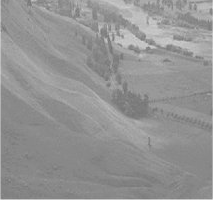

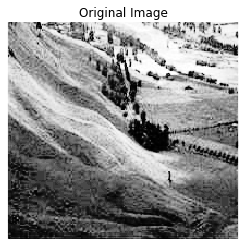

In [36]:
img = cv2.imread('media/M4/hist2.PNG',0)
equ = cv2.equalizeHist(img)

plt.imshow(equ,cmap='gray');plt.title("Original Image");plt.axis('off');

**See the histograms of before & After Equalization**

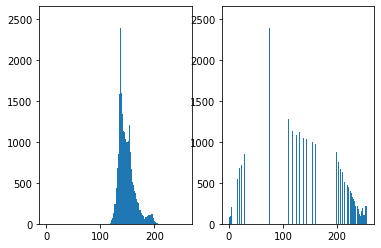

In [37]:
fig, ax = plt.subplots(1,2)

ax[0].hist(img.ravel(),256,[0,256]);
ax[1].hist(equ.ravel(),256,[0,256]);
plt.show()

**Image which already have good contrast can be made even better with equalization**

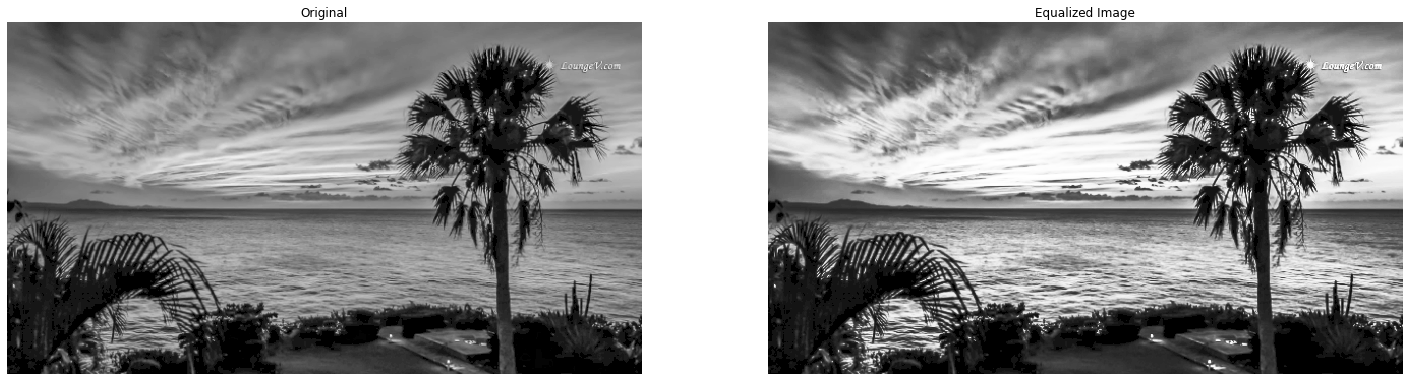

In [38]:
img = cv2.imread('media/M4/graybeach.PNG',0)
equ = cv2.equalizeHist(img)

plt.figure(figsize=[25,25])
plt.subplot(121);plt.imshow(img,cmap='gray');plt.title("Original");plt.axis('off');
plt.subplot(122);plt.imshow(equ,cmap='gray');plt.title("Equalized Image");plt.axis('off');

##  <font style="color:rgb(134,19,348)">Histogram Equalization Of Color Images </font>

Now its entirely possible to do histogram equalization on colored images but there's a catch, you should only be equalizing the channels related to brightness of the image and not modify the actual color channels (otherwise you will get weird colors). 

From the above statement its pretty clear that we cant do this in RGB Color Model, so we can switch to HSV COLOR MODEL where we can equalize only the value channel which will not modify the actual colors.

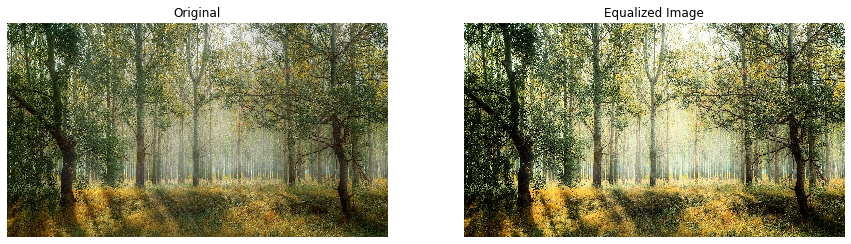

In [39]:
img = cv2.imread('media/M4/trees.jpg',1)

# Convert the image to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# performing histogram equalization only on the value Channel
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

# Converting back to BGR format
equ = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original");plt.axis('off');
plt.subplot(122);plt.imshow(equ[:,:,::-1]);plt.title("Equalized Image");plt.axis('off');

##  <font style="color:rgb(134,19,348)">CLAHE (Contrast Limited Adaptive Histogram Equalization)</font>

The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea.
look at the example picture below.

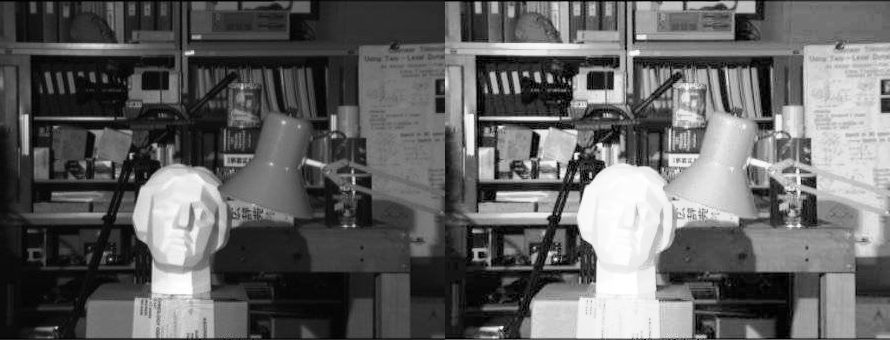



We lost most of the information in the sculpture there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases .

So to solve this problem, `adaptive histogram equalization` is used. In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region<br><br>
[```cv2.createCLAHE([, clipLimit[, tileGridSize]])```](https://docs.opencv.org/4.2.0/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018)



- `clipLimit`	Threshold for contrast limiting.
- `tileGridSize`	Size of grid for histogram equalization. Input image will be divided into equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.

###  <font style="color:rgb(134,19,348)">CLAHE in OpenCV </font>
lets perform clahe on the above image to see, how can we get better results

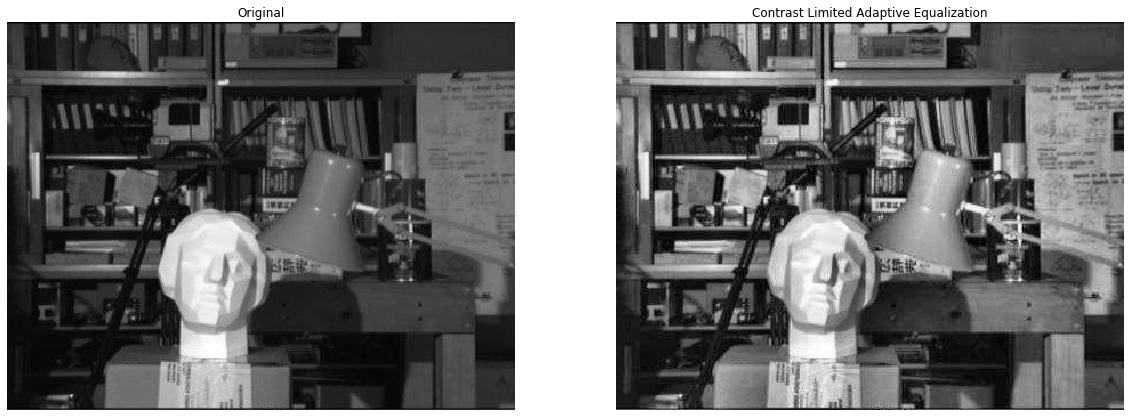

In [40]:
img = cv2.imread('media/M4/hist3.PNG',0)

# We first inililize the Clahe Object with certain clip value
clahe = cv2.createCLAHE(clipLimit=2.0)

# Now we apply that Clahe object to our image
clahe_image = clahe.apply(img)

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img, cmap = 'gray');plt.title("Original");plt.axis('off');
plt.subplot(122);plt.imshow(clahe_image, cmap = 'gray');plt.title("Contrast Limited Adaptive Equalization");plt.axis('off');